In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Data generations

In [4]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10,10,size=(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,size = (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

# To save a preprocess data in .npz format for preprocessing using Tensorflow 
# --------File_name--label------array----------label--------array----------
np.savez('TF_intro', inputs = generated_inputs, target = generated_targets)

## Solving with Tensorflow

In [6]:
# Data stage
training_data = np.load('TF_intro.npz')

In [36]:
# Model stage
input_size = 2
output_size = 1

# this - tf.keras.layers.Dense() -- is similar to outputs = np.dot(inputs, weights) + bias
# tf.keras.layers.Dense(output_size, kernal_initializer, bias_initializer)

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1),
                                                 bias_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1)
                                                 )
                            ])


custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.2)

# optimizer = 'sdg' is replace with custom_optimizer

# Objective function stage and optimization algorithm stage
# note - 
# sdg and mean_squared_error are the optimization algorithm
# optimizer and loss are the objective function
model.compile(optimizer=custom_optimizer, loss = 'mean_squared_error')

# to fit the model, Tensorflow also employ inputs and target
# model.fit(inputs, targets) fit trains the model
# note - Epoch = iteration over the full dataset
model.fit(training_data['inputs'], training_data['target'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: inf
Epoch 2/100
32/32 - 0s - loss: nan
Epoch 3/100
32/32 - 0s - loss: nan
Epoch 4/100
32/32 - 0s - loss: nan
Epoch 5/100
32/32 - 0s - loss: nan
Epoch 6/100
32/32 - 0s - loss: nan
Epoch 7/100
32/32 - 0s - loss: nan
Epoch 8/100
32/32 - 0s - loss: nan
Epoch 9/100
32/32 - 0s - loss: nan
Epoch 10/100
32/32 - 0s - loss: nan
Epoch 11/100
32/32 - 0s - loss: nan
Epoch 12/100
32/32 - 0s - loss: nan
Epoch 13/100
32/32 - 0s - loss: nan
Epoch 14/100
32/32 - 0s - loss: nan
Epoch 15/100
32/32 - 0s - loss: nan
Epoch 16/100
32/32 - 0s - loss: nan
Epoch 17/100
32/32 - 0s - loss: nan
Epoch 18/100
32/32 - 0s - loss: nan
Epoch 19/100
32/32 - 0s - loss: nan
Epoch 20/100
32/32 - 0s - loss: nan
Epoch 21/100
32/32 - 0s - loss: nan
Epoch 22/100
32/32 - 0s - loss: nan
Epoch 23/100
32/32 - 0s - loss: nan
Epoch 24/100
32/32 - 0s - loss: nan
Epoch 25/100
32/32 - 0s - loss: nan
Epoch 26/100
32/32 - 0s - loss: nan
Epoch 27/100
32/32 - 0s - loss: nan
Epoch 28/100
32/32 - 0s - loss: nan
E

## Extract the weight and bias

In [11]:
model.layers[0].get_weights()

[array([[ 1.9849868],
        [-3.005439 ]], dtype=float32),
 array([5.0345545], dtype=float32)]

In [12]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9849868],
       [-3.005439 ]], dtype=float32)

In [15]:
bias = model.layers[0].get_weights()[1]
bias

array([5.0345545], dtype=float32)

## Extract the outputs (make prediction)

In [18]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ 12.9],
       [ 27.3],
       [-27.9],
       [ 20.6],
       [ 36.3],
       [ -4.7],
       [ 32.2],
       [-35.4],
       [ 30.5],
       [-26.8],
       [  9. ],
       [-20.5],
       [-15.8],
       [ 31.1],
       [-24. ],
       [  5. ],
       [-12.6],
       [ -0.4],
       [ 30.3],
       [ -2.8],
       [  2.6],
       [ 39.4],
       [ 27.3],
       [ 11.6],
       [-10.4],
       [-16. ],
       [ 19.3],
       [-33.1],
       [ -8.7],
       [-11.3],
       [ 42.8],
       [ -8.9],
       [  1.8],
       [-30.5],
       [ 22.5],
       [ 33.8],
       [ 22.3],
       [-18.6],
       [  5.6],
       [  4.5],
       [ 12.7],
       [  7.4],
       [ 35.5],
       [ -7. ],
       [-32.7],
       [  4.2],
       [ 19.1],
       [ 27.6],
       [-24.7],
       [  4.3],
       [ 23.5],
       [ -5.9],
       [ -4. ],
       [-17.6],
       [-36. ],
       [ -7.1],
       [ 29.2],
       [ 20. ],
       [ 44. ],
       [ -7. ],
       [ 28. ],
       [ 10.2],
       [

In [26]:
(training_data['target']).round(1)

array([[ 12.4],
       [ 28. ],
       [-28.4],
       [ 20.6],
       [ 35.9],
       [ -4.1],
       [ 33. ],
       [-36.4],
       [ 30.5],
       [-26.9],
       [  8.8],
       [-21.5],
       [-16.4],
       [ 31.4],
       [-24.3],
       [  5.2],
       [-13.2],
       [ -1.4],
       [ 30.5],
       [ -2.4],
       [  1.7],
       [ 38.7],
       [ 26.2],
       [ 12.4],
       [ -9.9],
       [-16.8],
       [ 19.6],
       [-32.5],
       [ -7.9],
       [-12.2],
       [ 42.4],
       [ -8.7],
       [  1. ],
       [-29.9],
       [ 22.5],
       [ 34.2],
       [ 22. ],
       [-18. ],
       [  4.9],
       [  5. ],
       [ 13.3],
       [  6.9],
       [ 35.8],
       [ -7.7],
       [-32.1],
       [  4.6],
       [ 18.3],
       [ 26.7],
       [-24.2],
       [  5.1],
       [ 24.1],
       [ -5.2],
       [ -4. ],
       [-17.9],
       [-35.6],
       [ -6.7],
       [ 28.7],
       [ 20.3],
       [ 43.7],
       [ -7.5],
       [ 28.8],
       [ 10.5],
       [

## Ploting the data

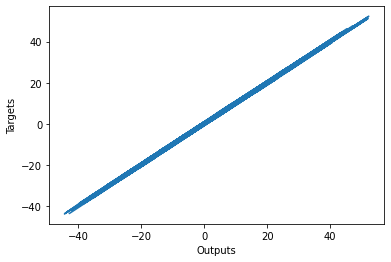

In [29]:
# Plotting the output against the target
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['target']))
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()